In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
27,463 cases (7 day average) as of Fri 09 Jul, +1,015.9 since Thu 08 Jul
487 hospitalised (7 day average) as of Mon 12 Jul, +27.7 since Sun 11 Jul
22 died (7 day average) as of Fri 09 Jul, +1.7 since Thu 08 Jul


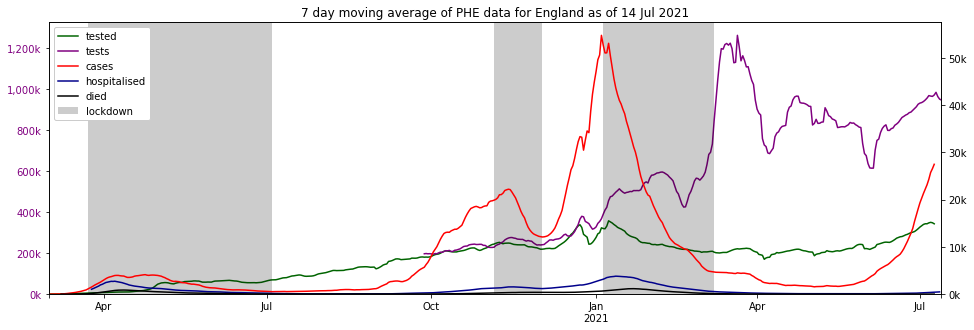

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

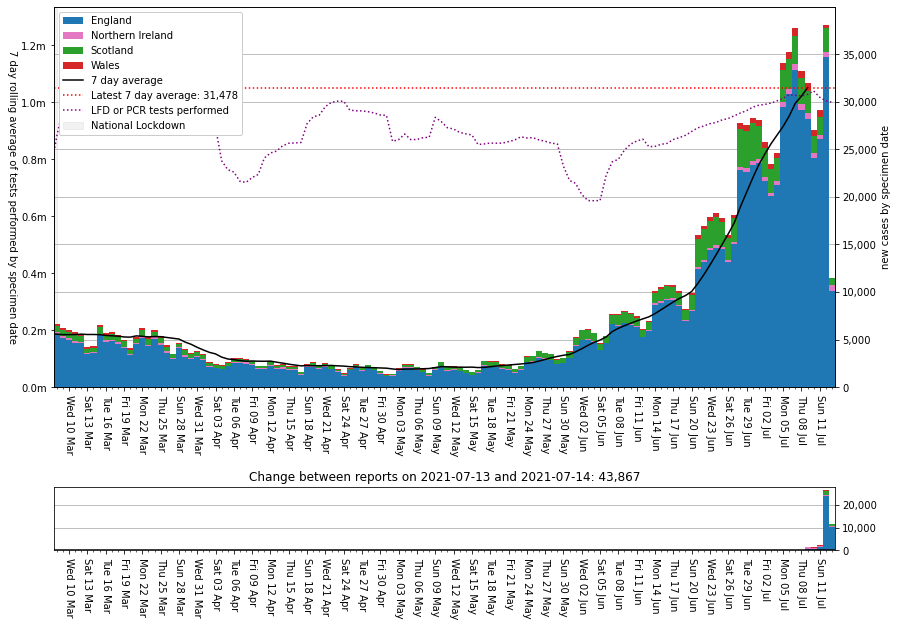

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

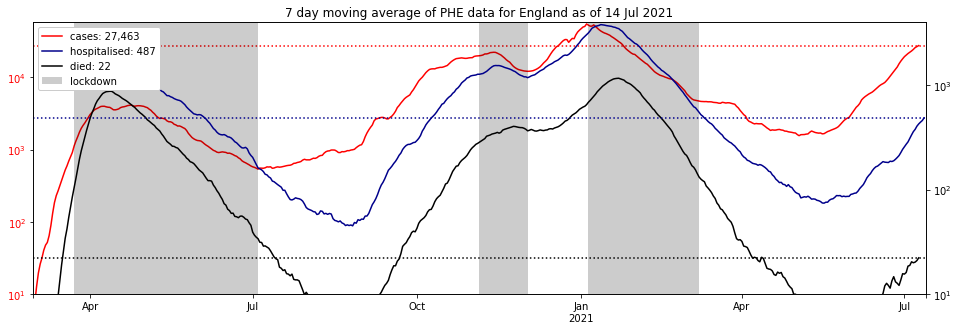

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

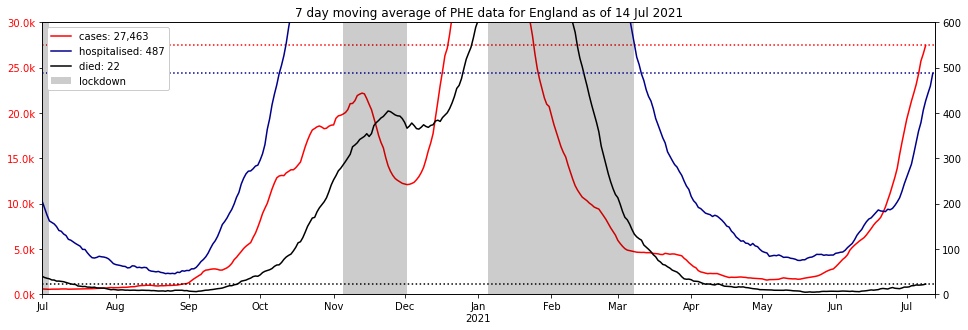

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=30_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=600)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,13 Jul 21,"+29,429,018","+38,624,143","+29,429,018","+124,905","+49,756","+124,905"
Northern Ireland,13 Jul 21,"+950,145","+1,187,446","+950,145","+6,367","+1,151","+6,367"
Scotland,13 Jul 21,"+2,914,904","+3,948,446","+2,914,904","+11,347","+6,875","+11,347"
Wales,13 Jul 21,"+1,861,700","+2,277,055","+1,861,700","+15,657","+1,291","+15,657"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,29429018.0,38624143.0,9195125.0,56286961,52.283899,16.336155,31.379946
1,Northern Ireland,N92000002,950145.0,1187446.0,237301.0,1893667,50.174872,12.531295,37.293833
2,Scotland,S92000003,2914904.0,3948446.0,1033542.0,5463300,53.354273,18.917907,27.727820
3,Wales,W92000004,1861700.0,2277055.0,415355.0,3152879,59.047620,13.173833,27.778548


'partial: 46,037,090 (68.9%), full: 35,155,767'

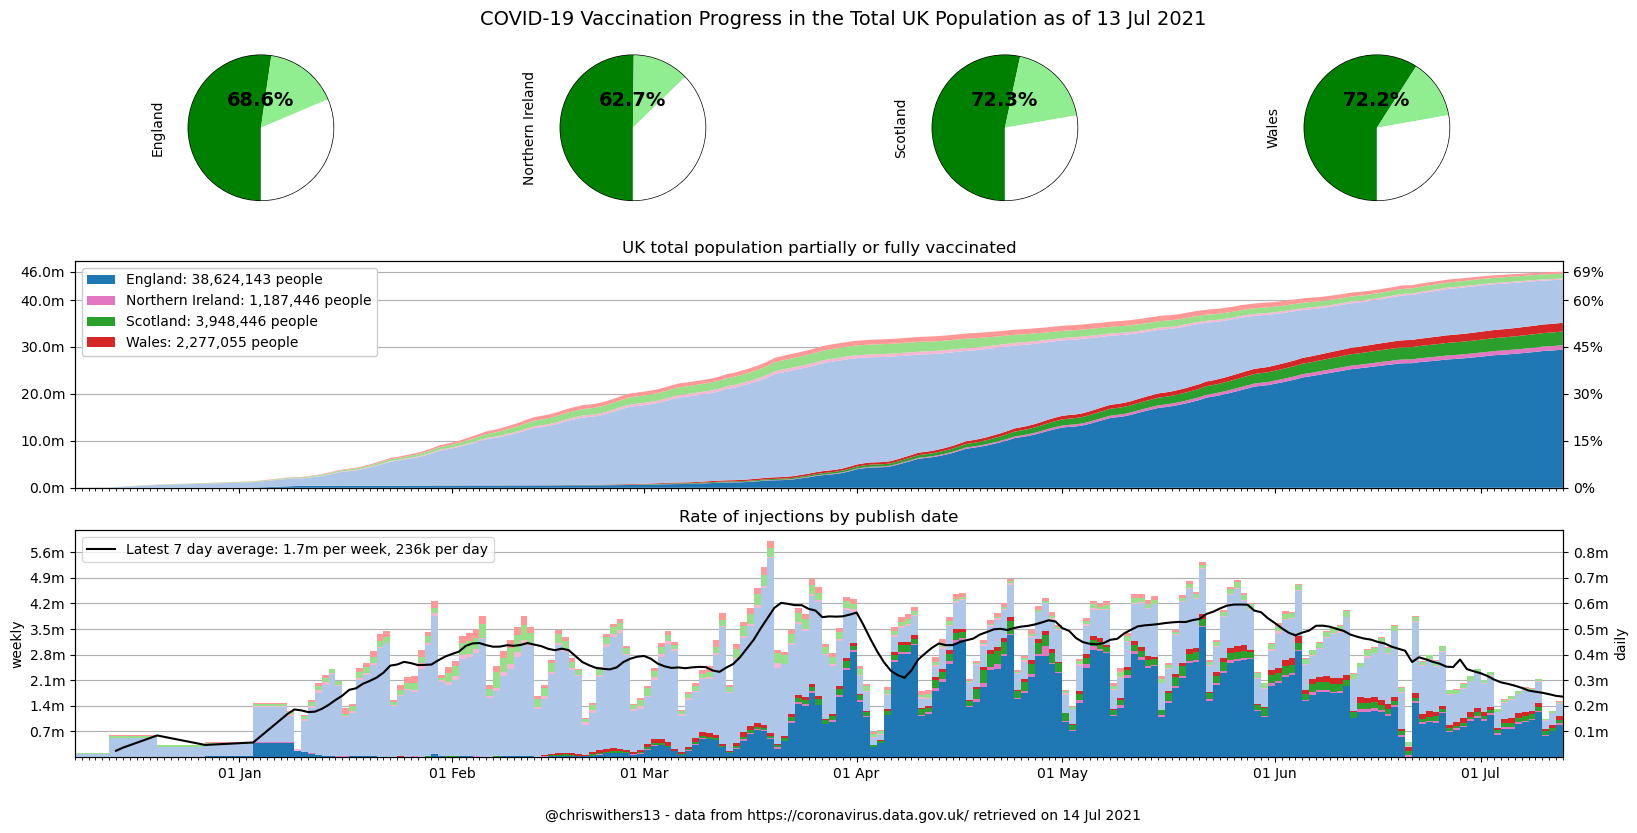

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

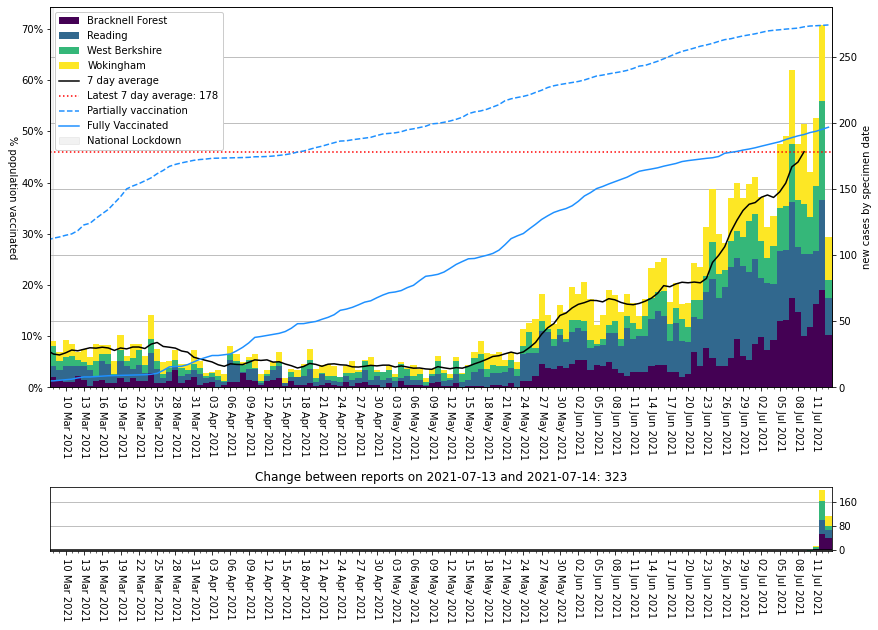

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

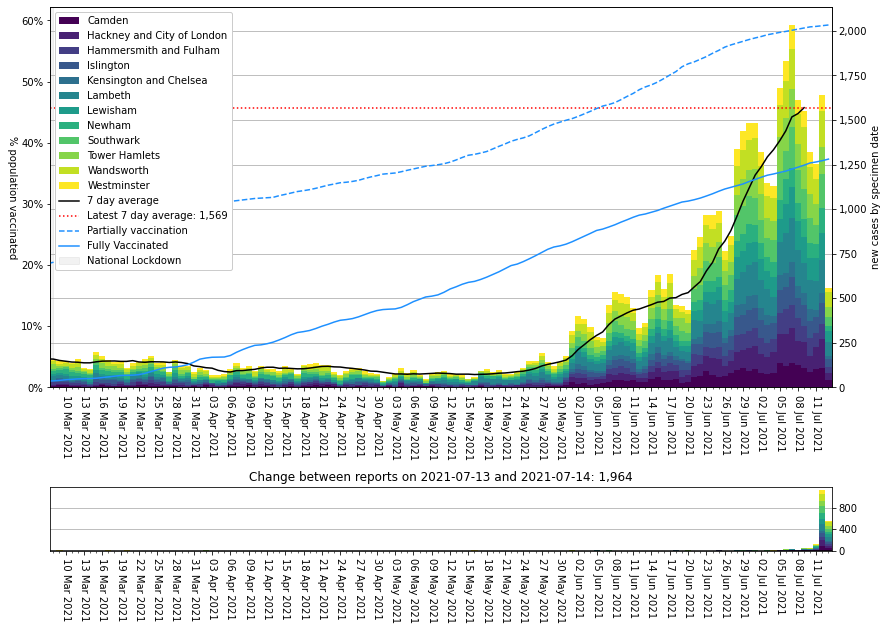

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,1098.850148,1659.0,2021-07-13
E06000003,Redcar and Cleveland,947.138170,1299.0,2021-07-13
E06000002,Middlesbrough,931.337778,1313.0,2021-07-13
E06000001,Hartlepool,882.952713,827.0,2021-07-13
E08000024,Sunderland,865.666805,2404.0,2021-07-13
E08000037,Gateshead,822.548316,1662.0,2021-07-13
E06000012,North East Lincolnshire,780.882786,1246.0,2021-07-13
E08000021,Newcastle upon Tyne,745.657486,2258.0,2021-07-13
E06000004,Stockton-on-Tees,718.527677,1418.0,2021-07-13


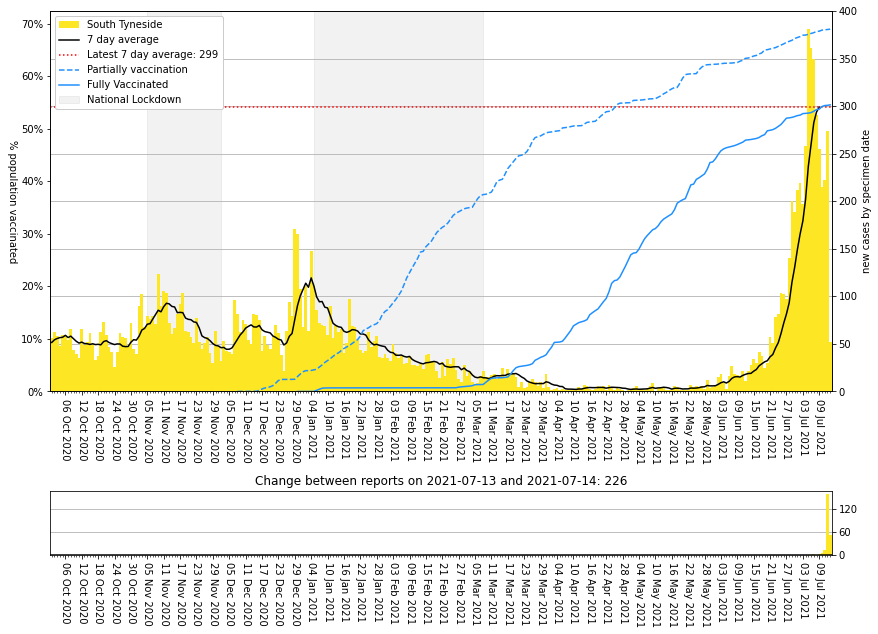

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,373.878103,4269.0,2021-07-13
E08000035,Leeds,506.090357,4014.0,2021-07-13
E06000047,County Durham,655.732757,3476.0,2021-07-13
E08000024,Sunderland,865.666805,2404.0,2021-07-13
E08000003,Manchester,434.831367,2404.0,2021-07-13
E06000023,"Bristol, City of",512.325817,2374.0,2021-07-13
E08000021,Newcastle upon Tyne,745.657486,2258.0,2021-07-13
E08000032,Bradford,394.793396,2131.0,2021-07-13
E08000012,Liverpool,422.253545,2103.0,2021-07-13


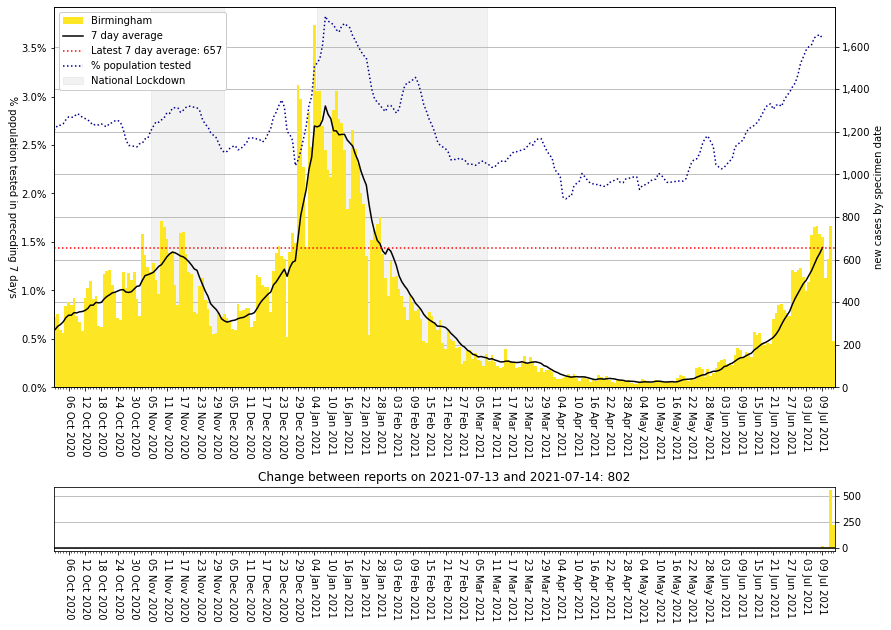

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

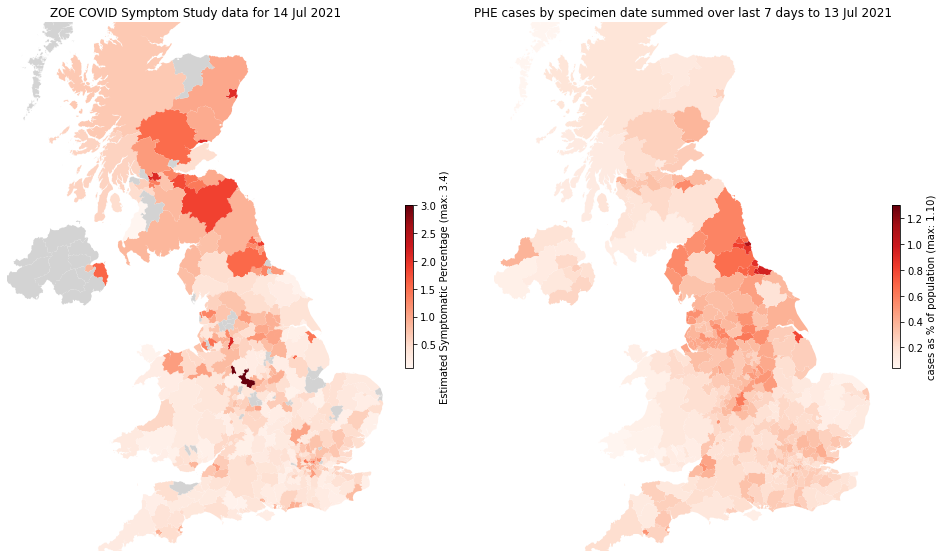

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...